# this a markdown


In [34]:
import random
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy import genfromtxt
import math

# Part 1

## Part 1.1

### Import from the csv file

In [35]:
data = genfromtxt('data1.csv', delimiter=',')

data = np.delete(data,0,0)


### Defining the variables for the normal distribution

In [36]:
mean1 = np.array([5,5])
mean1 = mean1.reshape((2, 1))

covariance = np.array([ [ 1 , 0 ] , [ 0 , 1 ] ])

mean2 = np.array([2,2])
mean2 = mean2.reshape((2, 1))


### Multiviarient Normal Distribution

In [37]:
def MultivariateNormalDistribution(mean, covariance, X):
   X = np.asarray(X)
   mean = np.asarray(mean)
   covariance = np.asarray(covariance)
   halfDimention = X.shape[0] / 2
   p1 = 1/((2 * math.pi ) ** halfDimention)* (1 / math.sqrt(np.linalg.det(covariance)))
   p2 =  np.dot( np.transpose((X - mean)) , np.linalg.inv(covariance))
   
   return p1  * np.exp((-1/2) * np.dot(p2 , (X - mean)) )



### Calculating multivarient normal dis for both normal dist and assigning the data to the distribution with higher probability

In [38]:



FirstDis = np.zeros((data.shape[0],))


for i in range(0, data.shape[0]):
    FirstDis[i] += MultivariateNormalDistribution(mean1,covariance,np.transpose(data[i].reshape((1,2))))
    


SecondDis = np.zeros((data.shape[0],))
for i in range(0, data.shape[0]):
    SecondDis[i] += MultivariateNormalDistribution(mean2,covariance,np.transpose(data[i].reshape((1,2))))
    

FirstDisFinalAnswer = []
DataForDisOne = []
SecondDisFinalAnswer = []
DataForDisTwo = []

for i in range(0, data.shape[0]):
    if(FirstDis[i] > SecondDis[i]):
        DataForDisOne.append(data[i])
        FirstDisFinalAnswer.append(FirstDis[i])
    else:
        DataForDisTwo.append(data[i])
        SecondDisFinalAnswer.append(SecondDis[i])

FirstDisFinalAnswer = np.array(FirstDisFinalAnswer)
DataForDisOne = np.array(DataForDisOne)
SecondDisFinalAnswer = np.array(SecondDisFinalAnswer)
DataForDisTwo = np.array(DataForDisTwo)


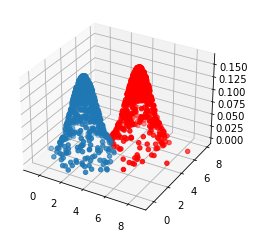

In [39]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(DataForDisOne[:,0],DataForDisOne[:,1],FirstDisFinalAnswer, c="red")
ax.scatter(DataForDisTwo[:,0],DataForDisTwo[:,1],SecondDisFinalAnswer)

plt.show()

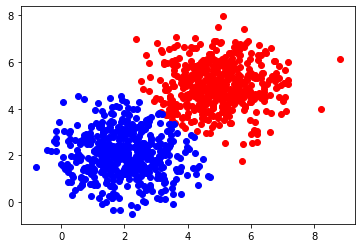

In [40]:
plt.plot(DataForDisOne[:,0],DataForDisOne[:,1], 'ro')
plt.plot(DataForDisTwo[:,0],DataForDisTwo[:,1], 'bo')
plt.show()

## Part 1.2

### Liklihood Function

In [41]:
def Likelihood(mean, covariance, X):
    
    Normal = []
    for i in range(0, X.shape[0]):
        Normal.append( MultivariateNormalDistribution(mean,covariance,np.transpose(X[i].reshape((1,2)))))
    
    return np.prod(Normal)

### Log of Likelihood

In [42]:
def LogLikelihood(mean, covariance, X):
    
    Normal = []
    for i in range(0, X.shape[0]):
        Normal.append( np.log( MultivariateNormalDistribution(mean,covariance,np.transpose(X[i].reshape((1,2))))))
    
    return np.sum(Normal)

### The answer of part 1.2

### On all data

In [43]:


print("On all data")

print("First Distribution")
print("The likelihood: " , Likelihood(mean1,covariance,data))
print("Log of the Likelihood: " ,  LogLikelihood(mean1,covariance,data))

print("")
print("------------------------------------------------")
print("")

print("Second Distribution")
print("The likelihood: " ,  Likelihood(mean2,covariance,data))
print("Log of the Likelihood: " ,  LogLikelihood(mean2,covariance,data))

On all data
First Distribution
The likelihood:  0.0
Log of the Likelihood:  -7254.811516924357

------------------------------------------------

Second Distribution
The likelihood:  0.0
Log of the Likelihood:  -7239.434376472873


### On Assigned data

In [44]:
ans = LogLikelihood(mean2,covariance,data)

print("On Assigned data")

print("First Distribution")
print("The likelihood: " , Likelihood(mean1,covariance,DataForDisOne))
print("Log of the Likelihood: " ,  LogLikelihood(mean1,covariance,DataForDisOne))

print("")
print("------------------------------------------------")
print("")

print("Second Distribution")
print("The likelihood: " ,  Likelihood(mean2,covariance,DataForDisTwo))
print("Log of the Likelihood: " ,  LogLikelihood(mean2,covariance,DataForDisTwo))

On Assigned data
First Distribution
The likelihood:  0.0
Log of the Likelihood:  -1398.7104595638054

------------------------------------------------

Second Distribution
The likelihood:  0.0
Log of the Likelihood:  -1388.26253341264


# Part 2

## Part 2.1

In [45]:
insuranceData = genfromtxt('insurance.csv', delimiter=',')
insuranceData = np.delete(insuranceData,(0), axis=0)


print(insuranceData[:, -1])

[16884.924   1725.5523  4449.462  ...  1629.8335  2007.945  29141.3603]


In [46]:
def hypotheses(teta , features):
    teta = np.array(teta)
    features = np.array(features)
    return np.transpose(teta) @ features


In [47]:
def CostFunction(data,teta):

    M = data.shape[0]
    N = data.shape[1]

    data = np.c_[np.ones(M) , data]

    X = data[:, :-1]
    Y = data[:, -1]
    Y = np.reshape(Y,(Y.shape[0],1))
    
    e = (X.dot(teta)) - Y
    return (1/ (2*M)) * (e.transpose() @ e)

In [48]:
def MSEDerivative(M,X,e):
    return (1 / M) * (X.transpose() @ (e))

In [49]:
def MSECost(M,e):
    return (1/ (2*M)) * (e.transpose() @ e)

In [50]:
def OneIterationGradientDescent(data,teta,learningRate):
    CopiedData = data
    M = CopiedData.shape[0]
    N = CopiedData.shape[1]

    CopiedData = np.c_[np.ones(M) , CopiedData]

    X = CopiedData[:, :-1]
    Y = CopiedData[:, -1]
    Y = np.reshape(Y,(Y.shape[0],1))
    
    e = (X.dot(teta)) - Y
    

    Derivative = MSEDerivative(M,X,e)
    
    teta = teta - (learningRate * (Derivative))
    
    return teta, MSECost(M,e)

In [51]:
def BatchGradientDescent(data,teta,learningRate,iterationCount): 
    
    Error = np.zeros([2,iterationCount])

    for i in range(iterationCount):
        Error[1,i] = i
        teta, Error[0,i] = OneIterationGradientDescent(data,teta,learningRate)
    return teta , Error


In [52]:
def MiniBatchGradienDescent(data,teta,learningRate,iterationCount, batchSizes ):
    M = data.shape[0]
    CopiedData = data
    if(M < batchSizes):
        return BatchGradientDescent(data,teta,learningRate,iterationCount)

    Error = np.zeros((2,iterationCount))


    for j in range(iterationCount):
        np.random.shuffle(CopiedData)
        Error[1,j] = j
        
        Error[0,j] = CostFunction(CopiedData,teta)
        teta,temp = OneIterationGradientDescent(CopiedData[0:batchSizes,],teta,learningRate)
        
    return teta,Error
    


In [53]:
def StochasticGradientDescent(data,teta,learningRate,iterationCount):
    return MiniBatchGradienDescent(data,teta,learningRate,iterationCount,1)

In [54]:
iterationCount = 50
learningRate = 0.0001
import random
GD_teta = np.zeros([insuranceData.shape[1],1])
GD_Error = np.zeros((2,iterationCount))

GD_teta , GD_Error = BatchGradientDescent(insuranceData,GD_teta,learningRate,iterationCount)

MBGD_teta = np.zeros([insuranceData.shape[1],1])
MBGD_Error = np.zeros((2,iterationCount))

MBGD_teta , MBGD_Error = MiniBatchGradienDescent(insuranceData,MBGD_teta,learningRate,iterationCount,32)


SGD_teta = np.zeros([insuranceData.shape[1],1])
SGD_Error = np.zeros((2,iterationCount))




SGD_teta , SGD_Error = StochasticGradientDescent(insuranceData,SGD_teta,learningRate,iterationCount)



In [55]:
f = [1,23,34.4,0]
print(hypotheses(GD_teta,f))

#print(Error)

[10589.10137897]


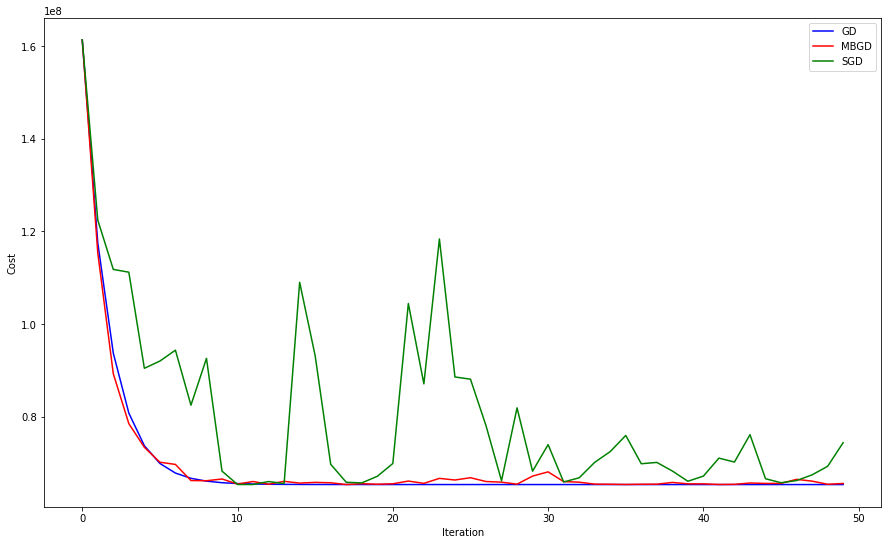

In [56]:
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.plot(GD_Error[1], GD_Error[0], 'b-')
plt.plot(MBGD_Error[1], MBGD_Error[0], 'r-')
plt.plot(SGD_Error[1], SGD_Error[0], 'g-')
plt.gcf().set_size_inches(15, 9)
plt.legend(['GD', 'MBGD', 'SGD'])



plt.show()

### همانطوری که در شکل واضح می باشد. هرچه مقدار دسته ی داده هایمان کوچکتر باشه تعداد اعوجاج بیشتر می باشد. چون مثلا در روش اس جی دی ما داریم هر داده ای که می بینیم تتا را حساب می کنیم که باعث می شود این تتا بر اساس هر داده ای که میبیند تغییر بسزایی کند ولی چون در روش مینی بچ چون دسته های داده ما بزرگتر می باشد بنابراین تعداد اعوجاج کمتر از روش استوکستیک می باشد و این اعوجاج در روش گرادینت دیسنت عادی از همه کمتر می باشد

### این تغییر تتا باعث می شود تا هزینه ها در گام های متوالی تغییر بسزایی کنند

## Part 2.2

### همانطور که از شکل هم واضح می باشد مینیمم خطایی که در روش گرادینت دیسنت وجود دارد از همه کمتر می باشد بعد از آن بچ گرادیان و بعد از آن نیز استوکستیک می باشد

### GD < Mini-Batch < SGD

### ولی سرعت همگرایی دقیقا برعکس می باشد

### SGD < Mini-Batch < GD

## Part 2.3

In [57]:
Rand_GD_teta = np.random.rand(insuranceData.shape[1],1)
Rand_GD_Error = np.zeros((2,iterationCount))

Rand_GD_teta , Rand_GD_Error = BatchGradientDescent(insuranceData,Rand_GD_teta,learningRate,iterationCount)


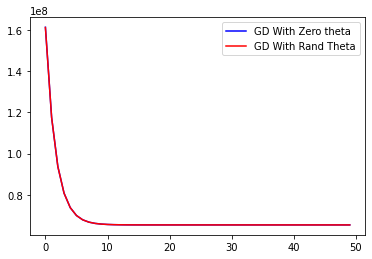

In [58]:
plt.plot(GD_Error[1], GD_Error[0], 'b-')
plt.plot(Rand_GD_Error[1], Rand_GD_Error[0], 'r-')
plt.legend(['GD With Zero theta', 'GD With Rand Theta', 'SGD'])



plt.show()

### همانطور که دیده می شود برای این داده تغییری نمی کند و هر دو همگرا می شوند. دلیلش این می باشد که چون تابع خطای ما به صورت محدب باشد تفاوتی نمی کند که تتا با چه مقدار اولیه ای مقدار دهی شده باشد. در هر صورت به بینه ی سراسری میل خواهد کرد

### البته قابل ذکر می باشد که در تعداد داده های زیاد ممکن است مقدار دهی رندوم دادن به تتا ما را زودتر به همگرایی برساند ولی در نهایت هردوتا حالت به همگرایی خواهند رسید

## Part 2.4

In [59]:
from random import uniform
def MAEDerivative(M,X,e):
    judge = 0

    judge = np.sign(e)
    for i in range(judge.shape[0]):
        if(judge[i] == 0):
            print("HHHHHHHHHHHHHHHHHHHHHHHHHH")
            judge[i] = uniform(-1, 1)
    
    delta = (1 / M) *  (X.transpose() @ judge.reshape(M,1))
    
    return np.reshape(delta,(delta.shape[0],1))

In [60]:
def MAECost(M,e):
    
    return (1/ (M)) * (np.sum(np.abs(e)))

In [61]:
def CostFunction_MAE(data,teta):

    M = data.shape[0]
    N = data.shape[1]

    data = np.c_[np.ones(M) , data]

    X = data[:, :-1]
    Y = data[:, -1]
    Y = np.reshape(Y,(Y.shape[0],1))
    
    e = (X.dot(teta)) - Y
    return (1/ (M)) * (np.sum(np.abs(e)))

In [62]:
def OneIterationGradientDescent_MAE(data,teta,learningRate):
    
    Copieddata = data


    M = Copieddata.shape[0]
    N = Copieddata.shape[1]

    Copieddata = np.c_[np.ones(M) , Copieddata]

    X = Copieddata[:, :-1]
    Y = Copieddata[:, -1]
    Y = np.reshape(Y,(Y.shape[0],1))
    
    e = (X.dot(teta)) - Y
    

    Derivative = MAEDerivative(M,X,e)
    
    teta = teta - (learningRate * (Derivative))

    
    return teta, MAECost(M,e)

In [63]:
def BatchGradientDescent_MAE(data,teta,learningRate,iterationCount): 
    
    Error = np.zeros([2,iterationCount])


    for i in range(iterationCount):
        Error[1,i] = i
        teta, Error[0,i] = OneIterationGradientDescent_MAE(data,teta,learningRate)
        
        

    return teta , Error

In [64]:
def MiniBatchGradienDescent_MAE(data,teta,learningRate,iterationCount, batchSizes ):
    M = data.shape[0]
    CopiedData = data
    
    if(M < batchSizes):
        return BatchGradientDescent_MAE(CopiedData,teta,learningRate,iterationCount)

    Error = np.zeros((2,iterationCount))


    for j in range(iterationCount):
        np.random.shuffle(CopiedData)
        Error[1,j] = j
        
        Error[0,j] = CostFunction_MAE(CopiedData,teta)
        teta,temp = OneIterationGradientDescent_MAE(CopiedData[0:batchSizes,],teta,learningRate)
        
    return teta,Error

In [65]:
def StochasticGradientDescent_MAE(data,teta,learningRate,iterationCount):
    return MiniBatchGradienDescent_MAE(data,teta,learningRate,iterationCount,1)

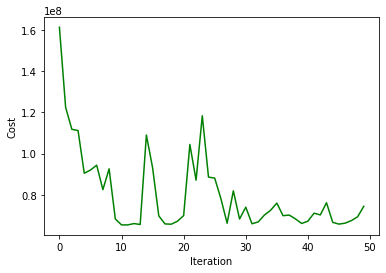

In [66]:
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(SGD_Error[1], SGD_Error[0], 'g-')

In [67]:
MAE_LearningRate = 0.1
SGD_MAE_teta = np.zeros([insuranceData.shape[1],1])
SGD_MAE_Error = np.zeros((2,iterationCount))

SGD_MAE_teta , SGD_MAE_Error = StochasticGradientDescent_MAE(insuranceData,SGD_MAE_teta,MAE_LearningRate,iterationCount)




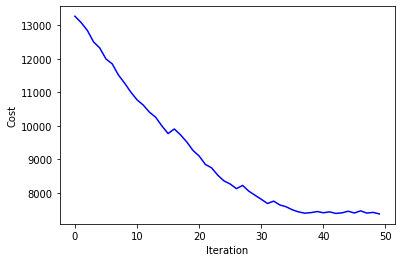

In [68]:
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.plot(SGD_MAE_Error[1], SGD_MAE_Error[0], 'b-')

### since MAE is not differentiable when predicted y is equal to the actual y, subgradient descent is used instead of Gradient descent .

### In this case when g = |X| X = 0 then g = [-1,1]


### البته در اینجا هیچ وقت به نقطه ای برخورد نمیکنیم که مشتق نداشته باشد

## Part 2.5

In [69]:
GD_teta = np.zeros([insuranceData.shape[1],1])
GD_Error = np.zeros((2,iterationCount))

GD_teta_Low , GD_Error_Low = BatchGradientDescent(insuranceData,GD_teta,0.0001,10)
GD_teta_High , GD_Error_High = BatchGradientDescent(insuranceData,GD_teta,0.01,10)

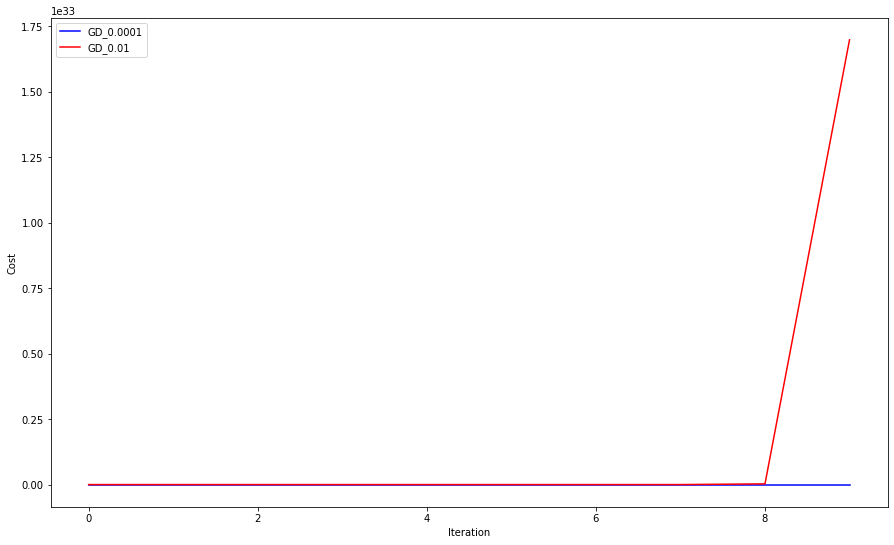

In [70]:
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.plot(GD_Error_Low[1], GD_Error_Low[0], 'b-')
plt.plot(GD_Error_High[1], GD_Error_High[0], 'r-')

plt.gcf().set_size_inches(15, 9)
plt.legend(['GD_0.0001', 'GD_0.01'])



plt.show()

### همانطور که دیده می شود در صورتی که ضریب یادگیری برابر با 0.01 باشد شکل واگرا می شود

## Part 2.6

In [71]:
GD_teta = np.zeros([insuranceData.shape[1],1])
GD_Error = np.zeros((2,iterationCount))

GD_teta_Low_ , GD_Error_Low_ = BatchGradientDescent(insuranceData,GD_teta,0.00001,150)
GD_teta_High_ , GD_Error_High_ = BatchGradientDescent(insuranceData,GD_teta,0.0001,150)

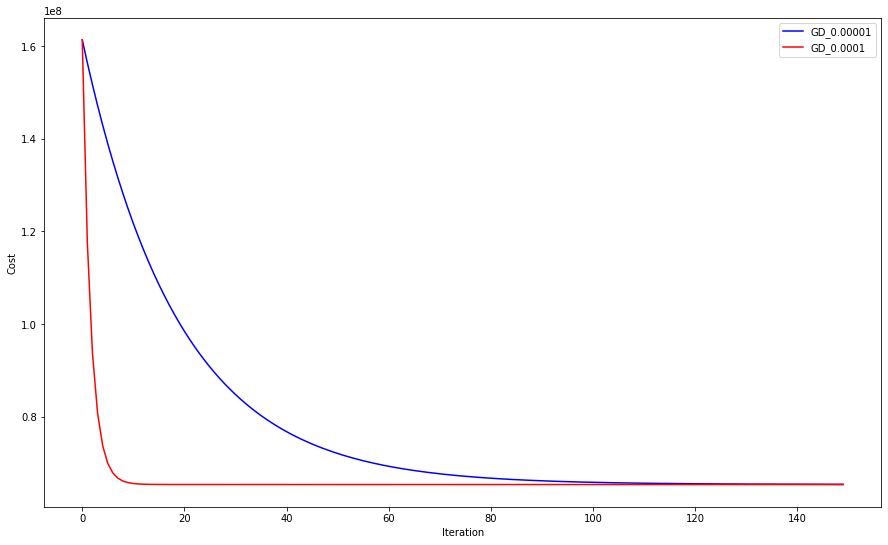

In [72]:
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.plot(GD_Error_Low_[1], GD_Error_Low_[0], 'b-')
plt.plot(GD_Error_High_[1], GD_Error_High_[0], 'r-')

plt.gcf().set_size_inches(15, 9)
plt.legend(['GD_0.00001', 'GD_0.0001'])



plt.show()

### همانطور که مشاهده می شود سرعت همگرایی خط آبی که دارای ضریب یادگیری کمتری می باشد، کمتر می باشد.

## part 2.7

In [73]:
def NormalizeFeatures(X):
    XStd = np.std(X, axis=0)

    Xmean = np.mean(X, axis=0)

    #return ((X - Xmean) / Range)
    return ((X - Xmean) / XStd)


In [74]:
X = insuranceData[:, :-1]
Y = insuranceData[:, -1]

Xnormal = NormalizeFeatures(X)

NormalizedData = Xnormal

NormalizedData = np.c_[NormalizedData,Y]



In [75]:

SGD_teta_regular_data = np.zeros([insuranceData.shape[1],1])
SGD_Error_regular_data = np.zeros((2,50))

SGD_teta_regular_data , SGD_Error_regular_data = StochasticGradientDescent(insuranceData,SGD_teta_regular_data,0.0001,250)


SGD_teta_normalized_data = np.zeros([NormalizedData.shape[1],1])
SGD_Error_normalized_data = np.zeros((2,50))



SGD_teta_normalized_data , SGD_Error_normalized_data = StochasticGradientDescent(NormalizedData,SGD_teta_normalized_data,0.03,250)

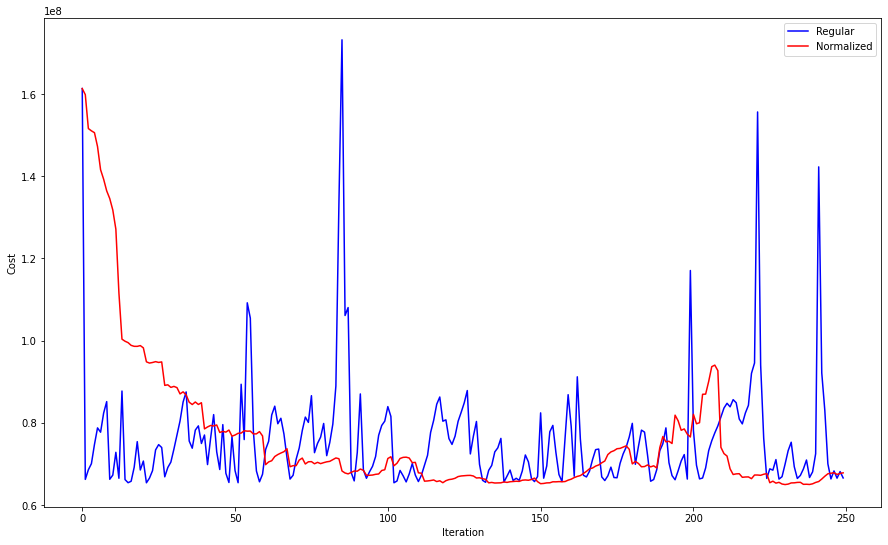

In [76]:
plt.xlabel('Iteration')
plt.ylabel('Cost')

plt.plot(SGD_Error_regular_data[1], SGD_Error_regular_data[0], 'b-')
plt.plot(SGD_Error_normalized_data[1], SGD_Error_normalized_data[0], 'r-')

plt.gcf().set_size_inches(15, 9)
plt.legend(['Regular', 'Normalized'])



plt.show()

### همانطور که از شکل مشخص می باشد سرعت همگرایی در هنگامیکه داده ها نرمال هستند کمتر می باشد. البته مقدار نویز نیز در داده های نرمال شده کمتر می باشد